In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
train_X_poly = poly.fit_transform(train_X)
train_X_poly.shape

(160, 14)

In [13]:
from sklearn.linear_model import LinearRegression
model_V2 = LinearRegression()
model_V2.fit(train_X_poly, train_y)

LinearRegression()

In [14]:
pred = model_V2.predict(poly.fit_transform(test_X))
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, pred)
r2 = r2_score(test_y, pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.40940330642510536
R^2 Score: 0.9870292556143071


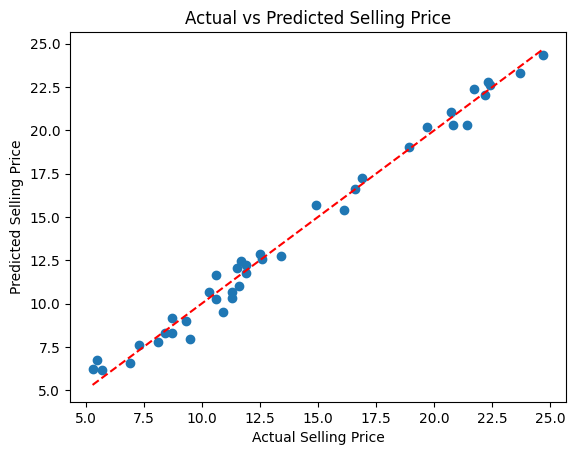

In [15]:
plt.scatter(test_y, pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')  # reference line
plt.show()
